# Overview 

In this tutorial, we'll be working with time series of measuring data from a machine 
<br>
 <font color='red'>.... data description goes here....</font>

We will explore how have varied over time, using pandas time series tools to classify into and answer question such as 
<br>
 <font color='red'>... what we want to predict goes here.....</font>

This tutorial is divided into 5 parts; which are:

1. Importing necessary modules
2. Load data 
3. Data labeling
4. Data visualization and exploration
4. Model development
5. Evaluation


## Import modules

First, we will get some necessary modules for visualization and reading and output files.

In [2]:
import pandas as pd 

import numpy as np 

import seaborn as sns 

sns.set() 

flatui = ["#4e67c8", "#f14124", "#5dceaf", "#34495e", "#a7ea52", "#5eccf3", "#ff8021", "#b4dcfa"] 

sns.set_palette(sns.color_palette(flatui)) 

sns.set_context('talk', font_scale=1) 


import matplotlib.pyplot as plt 

plt.rcParams['figure.figsize'] = [15,5] 

import os, glob 

import re 

import csv 

import pickle as pkl 

from IPython.display import display, HTML 


## Load data

As mentioned earlier, the dataset used in this tutorial is taken from 
<br>
 <font color='red'>.... data description goes here....</font>

We will create a DataFrame, which is a data structure in pandas that contains two-dimensional data and its corresponding labels. 
In pandas, we can do this in one line by passing the data from a pickle file, using the pandas function read_pickle(). 

In [4]:
# Read the data from the pickle file and store it in a Dataframe in pandas

data = pd.read_pickle('C:/Users/a.ziegenbein_lokal/ownCloud/Dokumente/Versuche/QS/Rohdaten/Versuch_G3_1_AP_QS_geschnitten_mit_Messwerten.pkl')

Next, we will have a look at the important features of the dataset such as feature names and the data type of the features by simply executing this command

In [5]:
# check out the name and data types of each feature
print(data.dtypes)

Schreiben bei Prog läuft NC-Programm     object
Antriebsmoment x-Achse                  float64
Antriebsmoment y-Achse                  float64
Antriebsmoment Spindel                  float64
aktuelle Spindeldrehzahl                float64
Strom x-Achse                           float64
Strom y-Achse                           float64
Strom z-Achse                           float64
Strom Spindel                           float64
Achsposition x-Achse                    float64
Achsposition y-Achse                    float64
Achsposition z-Achse                    float64
Bohrung                                 float64
Kraft                                   float64
mittl_DM                                float64
mittl_KF                                float64
xy_Verlauf                              float64
dtype: object


To get a high-level overview of the dataset, we use data.head() function to get the values from the first 5 rows of our dataset

In [6]:
# Display first 5 observations
data.head()

,Schreiben bei Prog läuft NC-Programm,Antriebsmoment x-Achse,Antriebsmoment y-Achse,Antriebsmoment Spindel,aktuelle Spindeldrehzahl,Strom x-Achse,Strom y-Achse,Strom z-Achse,Strom Spindel,Achsposition x-Achse,Achsposition y-Achse,Achsposition z-Achse,Bohrung,Kraft,mittl_DM,mittl_KF,xy_Verlauf
index,,,,,,,,,,,,,,,,,
2018-05-08 13:51:10.026,N160 G1 F=vf Z=-Bohrtiefe,0.516,0.838,-1.648,7488.727570,0.24472,0.392090,-5.184448,-2.152344,235.953,471.40035,149.73803,946.0,1616.0,6.7558,0.0284,0.02
2018-05-08 13:51:10.041,N160 G1 F=vf Z=-Bohrtiefe,0.516,0.815,-1.636,7488.842010,0.24472,0.392090,-5.214661,-2.124023,235.953,471.40035,149.27865,946.0,1616.0,6.7558,0.0284,0.02
2018-05-08 13:51:10.057,N160 G1 F=vf Z=-Bohrtiefe,0.516,0.815,-1.623,7489.414215,0.24472,0.408203,-5.320404,-2.124023,235.953,471.40035,148.81926,946.0,1616.0,6.7558,0.0284,0.02
2018-05-08 13:51:10.072,N160 G1 F=vf Z=-Bohrtiefe,0.516,0.838,-1.474,7491.245270,0.24472,0.397461,-5.287170,-1.989502,235.953,471.40035,148.47472,946.0,1616.0,6.7558,0.0284,0.02
2018-05-08 13:51:10.088,N160 G1 F=vf Z=-Bohrtiefe,0.516,0.849,-1.437,7491.073608,0.24472,0.402832,-5.320404,-1.954102,235.953,471.40035,148.01533,946.0,1616.0,6.7558,0.0284,0.02


We can see that our dataset index has the datatype datetime. In pandas, a basic kind of series object is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [7]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55394 entries, 2018-05-08 13:51:10.026000 to 2018-05-08 14:40:20.632000
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Schreiben bei Prog läuft NC-Programm  55394 non-null  object 
 1   Antriebsmoment x-Achse                55394 non-null  float64
 2   Antriebsmoment y-Achse                55394 non-null  float64
 3   Antriebsmoment Spindel                55394 non-null  float64
 4   aktuelle Spindeldrehzahl              55394 non-null  float64
 5   Strom x-Achse                         55394 non-null  float64
 6   Strom y-Achse                         55394 non-null  float64
 7   Strom z-Achse                         55394 non-null  float64
 8   Strom Spindel                         55394 non-null  float64
 9   Achsposition x-Achse                  55394 non-null  float64
 10  Achsposition y-Achse             

## Data labeling


As we can see, there is no information about the state of the tool state available in our dataset. However, we can determine the tool state based on the value of DM and KF using a threshold value. 
<br> 
<font color='red'>.... Explaination of the choosen rule goes here ....</font>
<br>
<font color='red'>.... DM is a metric to estimate the .... </font>
<br>
<font color='red'>.... KF is a metric to estimate the .... </font>

The values lower than this threshold and the value higher than this threshold will be labeled correspondingly as "NOK"/ not okay and "OK".

Before getting into labeling data, we might want to see basic statistics of DM and KF values

In [9]:
print("Statistics: ")
print("DM")
print(data['mittl_DM'].mean())
print(data['mittl_DM'].std())
print("KF")
print(data['mittl_KF'].mean())
print(data['mittl_KF'].std())

Statistics: 
DM
6.739367077974069
0.009811533338929689
KF
0.03179069697876064
0.017015545786350894


In [10]:
# Create a new DataFrame without unnecessary features 
Data_n = data.drop(['xy_Verlauf','Schreiben bei Prog läuft NC-Programm'], axis = 1) 

We can easily perform Labeling using the pandas cut() function. We want to divide them into two bins of ($-\infty$, threshold] and (threshold, $+\infty$] and add labels such as “NOK” and “OK”. It is important to standardize our data first to have a mean of zero and a standard deviation of 1. 
<br><br>Since the KF value already have a mean of zero, there is no need to subtract it by the mean to get the mean to zero.

In [11]:
# standardization on DM values

Data_n['mittl_DM'] = abs(Data_n['mittl_DM']-6.7) 

# create a threshold 
bins_DM = [-np.inf,  Data_n['mittl_DM'].quantile(.95), np. inf]
bins_KF = [-np.inf,  Data_n['mittl_KF'].quantile(.98), np. inf] 


# create an additional collumn KF_cat and DM_cat to store the newly created labels
DM_cat = pd.cut(Data_n['mittl_DM'], bins = bins_DM, labels = [ 1, 0 ]) 
KF_cat = pd.cut(Data_n['mittl_KF'], bins = bins_KF, labels = [ 1, 0 ])   

Next, add the two newly created collumn to the DataFrame

In [18]:
t = Data_n.join(DM_cat, rsuffix = '_cat') 

t = t.join(KF_cat, rsuffix = '_cat') 
  
#t.dropna(inplace = True) 

Now, we can give the label to an data entry (row) based on the value of the DM and KF label.

In [19]:
t['label'] =  np.where((t['mittl_DM_cat'] == 1) & (t['mittl_KF_cat'] == 1) , 'OK', 'NOK') 

m = t.pivot_table(index=['label'], aggfunc='size') 
m

Now, let's have a look again in the changes we have made with our dataset

In [20]:
t.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55394 entries, 2018-05-08 13:51:10.026000 to 2018-05-08 14:40:20.632000
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Antriebsmoment x-Achse    55394 non-null  float64 
 1   Antriebsmoment y-Achse    55394 non-null  float64 
 2   Antriebsmoment Spindel    55394 non-null  float64 
 3   aktuelle Spindeldrehzahl  55394 non-null  float64 
 4   Strom x-Achse             55394 non-null  float64 
 5   Strom y-Achse             55394 non-null  float64 
 6   Strom z-Achse             55394 non-null  float64 
 7   Strom Spindel             55394 non-null  float64 
 8   Achsposition x-Achse      55394 non-null  float64 
 9   Achsposition y-Achse      55394 non-null  float64 
 10  Achsposition z-Achse      55394 non-null  float64 
 11  Bohrung                   55342 non-null  float64 
 12  Kraft                     706 non-null    float64 
 1

<AxesSubplot:xlabel='index'>

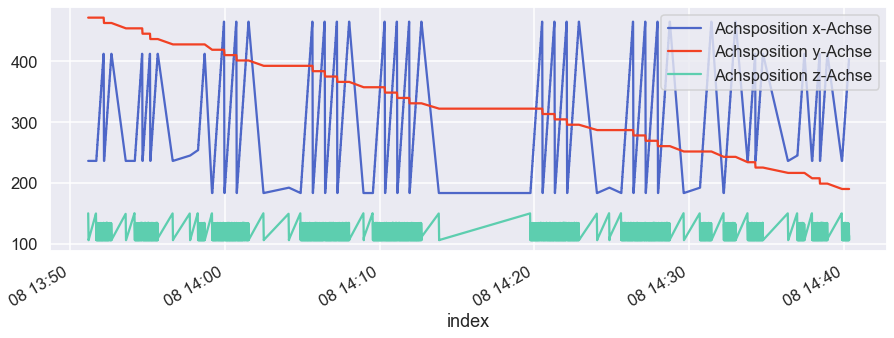

In [21]:
t[['Achsposition x-Achse', 'Achsposition y-Achse', 'Achsposition z-Achse']].plot()



In [22]:
t.head()

,Antriebsmoment x-Achse,Antriebsmoment y-Achse,Antriebsmoment Spindel,aktuelle Spindeldrehzahl,Strom x-Achse,Strom y-Achse,Strom z-Achse,Strom Spindel,Achsposition x-Achse,Achsposition y-Achse,Achsposition z-Achse,Bohrung,Kraft,mittl_DM,mittl_KF,mittl_DM_cat,mittl_KF_cat,label
index,,,,,,,,,,,,,,,,,,
2018-05-08 13:51:10.026,0.516,0.838,-1.648,7488.727570,0.24472,0.392090,-5.184448,-2.152344,235.953,471.40035,149.73803,946.0,1616.0,0.0558,0.0284,0,1,NOK
2018-05-08 13:51:10.041,0.516,0.815,-1.636,7488.842010,0.24472,0.392090,-5.214661,-2.124023,235.953,471.40035,149.27865,946.0,1616.0,0.0558,0.0284,0,1,NOK
2018-05-08 13:51:10.057,0.516,0.815,-1.623,7489.414215,0.24472,0.408203,-5.320404,-2.124023,235.953,471.40035,148.81926,946.0,1616.0,0.0558,0.0284,0,1,NOK
2018-05-08 13:51:10.072,0.516,0.838,-1.474,7491.245270,0.24472,0.397461,-5.287170,-1.989502,235.953,471.40035,148.47472,946.0,1616.0,0.0558,0.0284,0,1,NOK
2018-05-08 13:51:10.088,0.516,0.849,-1.437,7491.073608,0.24472,0.402832,-5.320404,-1.954102,235.953,471.40035,148.01533,946.0,1616.0,0.0558,0.0284,0,1,NOK


## Data visualization and exploration


The plot will help us to have an overview of the trends of each features. We will be using the subplot function to plot each features on separate subplots to see them more clearly

array([<AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>, <AxesSubplot:xlabel='index'>,
       <AxesSubplot:xlabel='index'>], dtype=object)

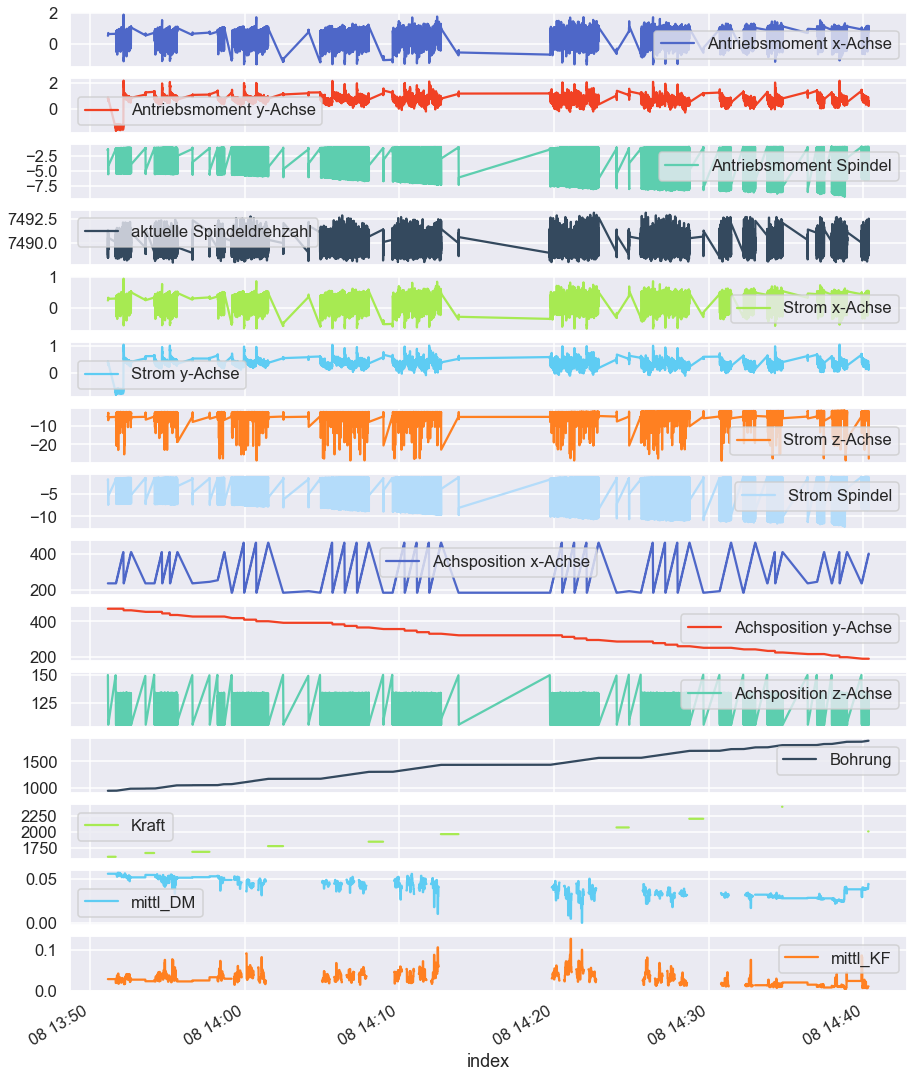

In [23]:
# Define subplot settings
t.plot(subplots=True, figsize=(15,20))

<AxesSubplot:xlabel='index'>

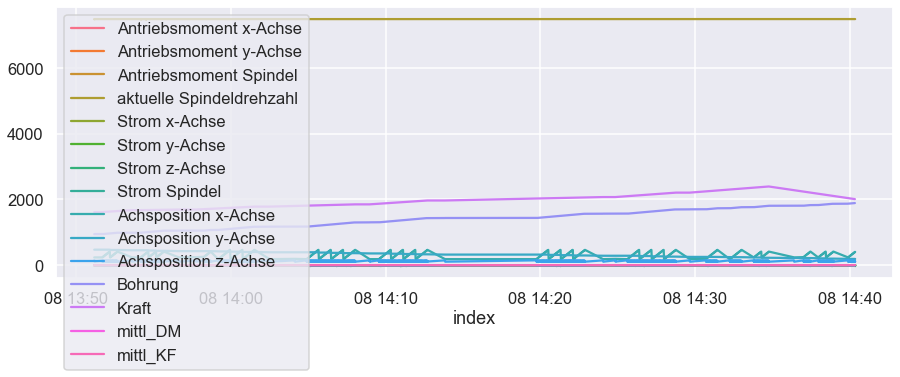

In [35]:
sns.lineplot(data = t.drop(['mittl_DM_cat', 'mittl_KF_cat', 'label'], axis = 1), dashes = False)

## Model development


In this step, we will apply random forest classifier to predict the state of our tool. 
<br> Random Forest is an ensemle of Decision Trees, generally trained via the bagging method  typicallly with max_samples set to the size of the training set. The algorithm involves in these following steps: 
1. Train/ test split:
2. Model train

### Train/ test split
First, we separate the columns into dependent and independent variables ( features and labels). Then we split those variables into a training and test set.

In [36]:
print(t.iloc[:,:-1].shape)

(55394, 17)


In [45]:
t = t[t['mittl_DM'].notna()]

In [56]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(t[['Strom x-Achse', 'Strom y-Achse', 'Strom z-Achse']], t['label'], test_size=0.3) 



In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28081 entries, 2018-05-08 14:39:59.114000 to 2018-05-08 13:55:33.881000
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Strom x-Achse  28081 non-null  float64
 1   Strom y-Achse  28081 non-null  float64
 2   Strom z-Achse  28081 non-null  float64
dtypes: float64(3)
memory usage: 877.5 KB


In [58]:
# We have now separate the label from the dataset
print(t.iloc[:,:-1].shape)
print(t.shape)

(40116, 17)
(40116, 18)


After splitting, you will train the model on the training set and perform predictions on the test set.

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Create a Gausian Classifier
classifier = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16)

# Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

# Apply the trained model on test set 
y_pred = classifier.predict(X_test)

After training, check the accuracy using actual and predicted values on the test set

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.943581221437474


In [55]:
from pyts.classification import time_series_forest

clf = time_series_forest.TimeSeriesForest()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("%.2f" % accuracy)

ImportError: cannot import name 'time_series_forest' from 'pyts.classification' (C:\Anaconda3\lib\site-packages\pyts\classification\__init__.py)

## Evaluation and cross validation

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import TimeSeriesSplit

#scores = cross_val_score(clf, X_train, y_train, cv=10, scoring = )

## Reference
[Re8c30ea33529-1]	H. Deng, G. Runger, E. Tuv and M. Vladimir, “A Time Series Forest for Classification and Feature Extraction”. Information Sciences, 239, 142-153 (2013).